In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import MinMaxScaler

import scipy.optimize as opt

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedBaggingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#SVM
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [2]:
#pip install imblearn

In [3]:
#df = pd.read_csv('heart_dataset.csv')
df = pd.read_csv('heart_2020_cleaned.csv')
print(df['HeartDisease'].value_counts()/len(df))
print(df['HeartDisease'].value_counts())

print(df.shape)
df

No     0.914405
Yes    0.085595
Name: HeartDisease, dtype: float64
No     292422
Yes     27373
Name: HeartDisease, dtype: int64
(319795, 18)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [4]:
unique_labels(df['Asthma'])

array(['No', 'Yes'], dtype='<U3')

In [5]:
df.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
BMI,319795.000000,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,319795.000000,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,319795.000000,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
SleepTime,319795.000000,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


In [6]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [7]:
unique_labels(df['AgeCategory'])

array(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
       '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'],
      dtype='<U11')

In [8]:
unique_labels(df['Race'])

array(['American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic',
       'Other', 'White'], dtype='<U30')

In [9]:
dic = {'No': 0, 'Yes': 1}
df['HeartDisease'] = df['HeartDisease'].map(dic).astype('category')
df['Smoking'] = df['Smoking'].map(dic).astype('category')
df['AlcoholDrinking'] = df['AlcoholDrinking'].map(dic).astype('category')
df['Stroke'] = df['Stroke'].map(dic).astype('category')
df['DiffWalking'] = df['DiffWalking'].map(dic).astype('category')
df['PhysicalActivity'] = df['PhysicalActivity'].map(dic).astype('category')
df['Asthma'] = df['Asthma'].map(dic).astype('category')
df['KidneyDisease'] = df['KidneyDisease'].map(dic).astype('category')
df['SkinCancer'] = df['SkinCancer'].map(dic).astype('category')

dic = {'Male': 0, 'Female': 1}
df['Sex'] = df['Sex'].map(dic).astype('category')
 
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,40-44,White,No,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,0,60-64,Hispanic,Yes,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,0,35-39,Hispanic,No,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,1,45-49,Hispanic,No,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,1,25-29,Hispanic,No,0,Good,12.0,0,0,0


In [10]:
y = pd.get_dummies(df.Race, prefix='Race')
df = pd.concat([df, y], axis=1)

df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,16.60,1,0,0,3.0,30.0,0,1,55-59,...,5.0,1,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,80 or older,...,7.0,0,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,0,65-69,...,8.0,1,0,0,0,0,0,0,0,1
3,0,24.21,0,0,0,0.0,0.0,0,1,75-79,...,6.0,0,0,1,0,0,0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,40-44,...,8.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,0,60-64,...,6.0,1,0,0,0,0,0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,0,35-39,...,5.0,1,0,0,0,0,0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,1,45-49,...,6.0,0,0,0,0,0,0,1,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,1,25-29,...,12.0,0,0,0,0,0,0,1,0,0


In [11]:
df.drop('Race', inplace=True, axis=1)

df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,16.60,1,0,0,3.0,30.0,0,1,55-59,...,5.0,1,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,80 or older,...,7.0,0,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,0,65-69,...,8.0,1,0,0,0,0,0,0,0,1
3,0,24.21,0,0,0,0.0,0.0,0,1,75-79,...,6.0,0,0,1,0,0,0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,40-44,...,8.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,0,60-64,...,6.0,1,0,0,0,0,0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,0,35-39,...,5.0,1,0,0,0,0,0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,1,45-49,...,6.0,0,0,0,0,0,0,1,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,1,25-29,...,12.0,0,0,0,0,0,0,1,0,0


In [12]:
df['Race_American Indian/Alaskan Native'] = df['Race_American Indian/Alaskan Native'].astype('category')
df['Race_Asian'] = df['Race_Asian'].astype('category')
df['Race_Black'] = df['Race_Black'].astype('category')
df['Race_Hispanic'] = df['Race_Hispanic'].astype('category')
df['Race_Other'] = df['Race_Other'].astype('category')    
df['Race_White'] = df['Race_White'].astype('category')

In [13]:
#AgeCategory

dic = {}

dic["18-24"] = 0
j = 1
for i in np.arange(25, 80, 5):
    dic[str(i)+"-"+str(i+4)] = j
    j = j+1
    
dic["80 or older"] = j

dic

{'18-24': 0,
 '25-29': 1,
 '30-34': 2,
 '35-39': 3,
 '40-44': 4,
 '45-49': 5,
 '50-54': 6,
 '55-59': 7,
 '60-64': 8,
 '65-69': 9,
 '70-74': 10,
 '75-79': 11,
 '80 or older': 12}

In [14]:
df['AgeCategory'] = df['AgeCategory'].map(dic)

In [15]:
x = pd.get_dummies(df.Diabetic, prefix='Diabetic')
df = pd.concat([df, x], axis=1)
df.drop('Diabetic', inplace=True, axis=1)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,0,16.60,1,0,0,3.0,30.0,0,1,7,...,0,0,0,0,0,1,0,0,1,0
1,0,20.34,0,0,1,0.0,0.0,0,1,12,...,0,0,0,0,0,1,1,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,9,...,0,0,0,0,0,1,0,0,1,0
3,0,24.21,0,0,0,0.0,0.0,0,1,11,...,0,0,0,0,0,1,1,0,0,0
4,0,23.71,0,0,0,28.0,0.0,1,1,4,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,0,8,...,0,0,0,1,0,0,0,0,1,0
319791,0,29.84,1,0,0,0.0,0.0,0,0,3,...,0,0,0,1,0,0,1,0,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,1,5,...,0,0,0,1,0,0,1,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,1,1,...,0,0,0,1,0,0,1,0,0,0


In [16]:
df['Diabetic_No'] = df['Diabetic_No'].astype('category')
df['Diabetic_No, borderline diabetes'] = df['Diabetic_No, borderline diabetes'].astype('category')
df['Diabetic_Yes'] = df['Diabetic_Yes'].astype('category')
df['Diabetic_Yes (during pregnancy)'] = df['Diabetic_Yes (during pregnancy)'].astype('category')

In [17]:
unique_labels(df['GenHealth'])

array(['Excellent', 'Fair', 'Good', 'Poor', 'Very good'], dtype='<U9')

In [18]:
dic = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4}

df['GenHealth'] = df['GenHealth'].map(dic)

In [19]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,GenHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,6.514536,2.595028,7.097075
std,6.356100,7.95085,7.955235,3.564759,1.042918,1.436007
min,12.020000,0.00000,0.000000,0.000000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,4.000000,2.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000,3.000000,7.000000
75%,31.420000,2.00000,3.000000,9.000000,3.000000,8.000000
max,94.850000,30.00000,30.000000,12.000000,4.000000,24.000000


In [20]:
scaler_x = MinMaxScaler()
data = df[['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'GenHealth', 'SleepTime']]
data

,BMI,PhysicalHealth,MentalHealth,AgeCategory,GenHealth,SleepTime
0,16.60,3.0,30.0,7,3,5.0
1,20.34,0.0,0.0,12,3,7.0
2,26.58,20.0,30.0,9,1,8.0
3,24.21,0.0,0.0,11,2,6.0
4,23.71,28.0,0.0,4,3,8.0
...,...,...,...,...,...,...
319790,27.41,7.0,0.0,8,1,6.0
319791,29.84,0.0,0.0,3,3,5.0
319792,24.24,0.0,0.0,5,2,6.0
319793,32.81,0.0,0.0,1,2,12.0


In [21]:
#scaler_x = MinMaxScaler()
#data = df['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'GenHealth', 'SleepTime']
scaler_x.fit(data)
data_scaled = scaler_x.transform(data)
df_scaled = pd.DataFrame(data_scaled, columns=data.columns)

In [22]:
df[['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'GenHealth', 'SleepTime']] = df_scaled[['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'GenHealth', 'SleepTime']]

In [23]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,0,0.055294,1,0,0,0.100000,1.0,0,1,0.583333,...,0,0,0,0,0,1,0,0,1,0
1,0,0.100447,0,0,1,0.000000,0.0,0,1,1.000000,...,0,0,0,0,0,1,1,0,0,0
2,0,0.175782,1,0,0,0.666667,1.0,0,0,0.750000,...,0,0,0,0,0,1,0,0,1,0
3,0,0.147169,0,0,0,0.000000,0.0,0,1,0.916667,...,0,0,0,0,0,1,1,0,0,0
4,0,0.141132,0,0,0,0.933333,0.0,1,1,0.333333,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,0.185802,1,0,0,0.233333,0.0,1,0,0.666667,...,0,0,0,1,0,0,0,0,1,0
319791,0,0.215139,1,0,0,0.000000,0.0,0,0,0.250000,...,0,0,0,1,0,0,1,0,0,0
319792,0,0.147531,0,0,0,0.000000,0.0,0,1,0.416667,...,0,0,0,1,0,0,1,0,0,0
319793,0,0.250996,0,0,0,0.000000,0.0,0,1,0.083333,...,0,0,0,1,0,0,1,0,0,0


In [24]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,GenHealth,SleepTime
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.196854,0.112390,0.129946,0.542878,0.648757,0.265090
std,0.076737,0.265028,0.265175,0.297063,0.260730,0.062435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.144996,0.000000,0.000000,0.333333,0.500000,0.217391
50%,0.184957,0.000000,0.000000,0.583333,0.750000,0.260870
75%,0.234215,0.066667,0.100000,0.750000,0.750000,0.304348
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## No hay NaN 

In [25]:
print(len(df))

df.dropna()

print(len(df))

319795
319795


## No Tocar

In [26]:
'''df_cocat= pd.read_csv('heart_2020_cleaned.csv')

dic = {'No': 0, 'Yes': 1}
df_cocat['HeartDisease'] = df['HeartDisease'].map(dic)
df_cocat['Smoking'] = df['Smoking'].map(dic)
df_cocat['AlcoholDrinking'] = df['AlcoholDrinking'].map(dic)
df_cocat['Stroke'] = df['Stroke'].map(dic)
df_cocat['DiffWalking'] = df['DiffWalking'].map(dic)
df_cocat['PhysicalActivity'] = df['PhysicalActivity'].map(dic)
df_cocat['Asthma'] = df['Asthma'].map(dic)
df_cocat['KidneyDisease'] = df['KidneyDisease'].map(dic)
df_cocat['SkinCancer'] = df['SkinCancer'].map(dic)
dic = {'Male': 0, 'Female': 1}
df_cocat['Sex'] = df['Sex'].map(dic)

y = pd.get_dummies(df_cocat.Race, prefix='Race')
df_cocat = pd.concat([df_cocat, y], axis=1)

df_cocat.drop('Race', inplace=True, axis=1)'''

"df_cocat= pd.read_csv('heart_2020_cleaned.csv')\n\ndic = {'No': 0, 'Yes': 1}\ndf_cocat['HeartDisease'] = df['HeartDisease'].map(dic)\ndf_cocat['Smoking'] = df['Smoking'].map(dic)\ndf_cocat['AlcoholDrinking'] = df['AlcoholDrinking'].map(dic)\ndf_cocat['Stroke'] = df['Stroke'].map(dic)\ndf_cocat['DiffWalking'] = df['DiffWalking'].map(dic)\ndf_cocat['PhysicalActivity'] = df['PhysicalActivity'].map(dic)\ndf_cocat['Asthma'] = df['Asthma'].map(dic)\ndf_cocat['KidneyDisease'] = df['KidneyDisease'].map(dic)\ndf_cocat['SkinCancer'] = df['SkinCancer'].map(dic)\ndic = {'Male': 0, 'Female': 1}\ndf_cocat['Sex'] = df['Sex'].map(dic)\n\ny = pd.get_dummies(df_cocat.Race, prefix='Race')\ndf_cocat = pd.concat([df_cocat, y], axis=1)\n\ndf_cocat.drop('Race', inplace=True, axis=1)"

### Correlaciones

Como se puede observar en la tabla de debajo ninguna variable numérica se encuentra correlacionada a más de 0.5 en valor absoluto con otra variable numérica del dataset

In [27]:
correl=df.corr(method='pearson')

#correl[abs(correl) >= 0.5]
correl

,BMI,PhysicalHealth,MentalHealth,AgeCategory,GenHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.004744,-0.230720,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,0.110763,-0.482697,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.155506,-0.241625,-0.119717
AgeCategory,-0.004744,0.110763,-0.155506,1.000000,-0.188381,0.104953
GenHealth,-0.230720,-0.482697,-0.241625,-0.188381,1.000000,0.063071
SleepTime,-0.051822,-0.061387,-0.119717,0.104953,0.063071,1.000000


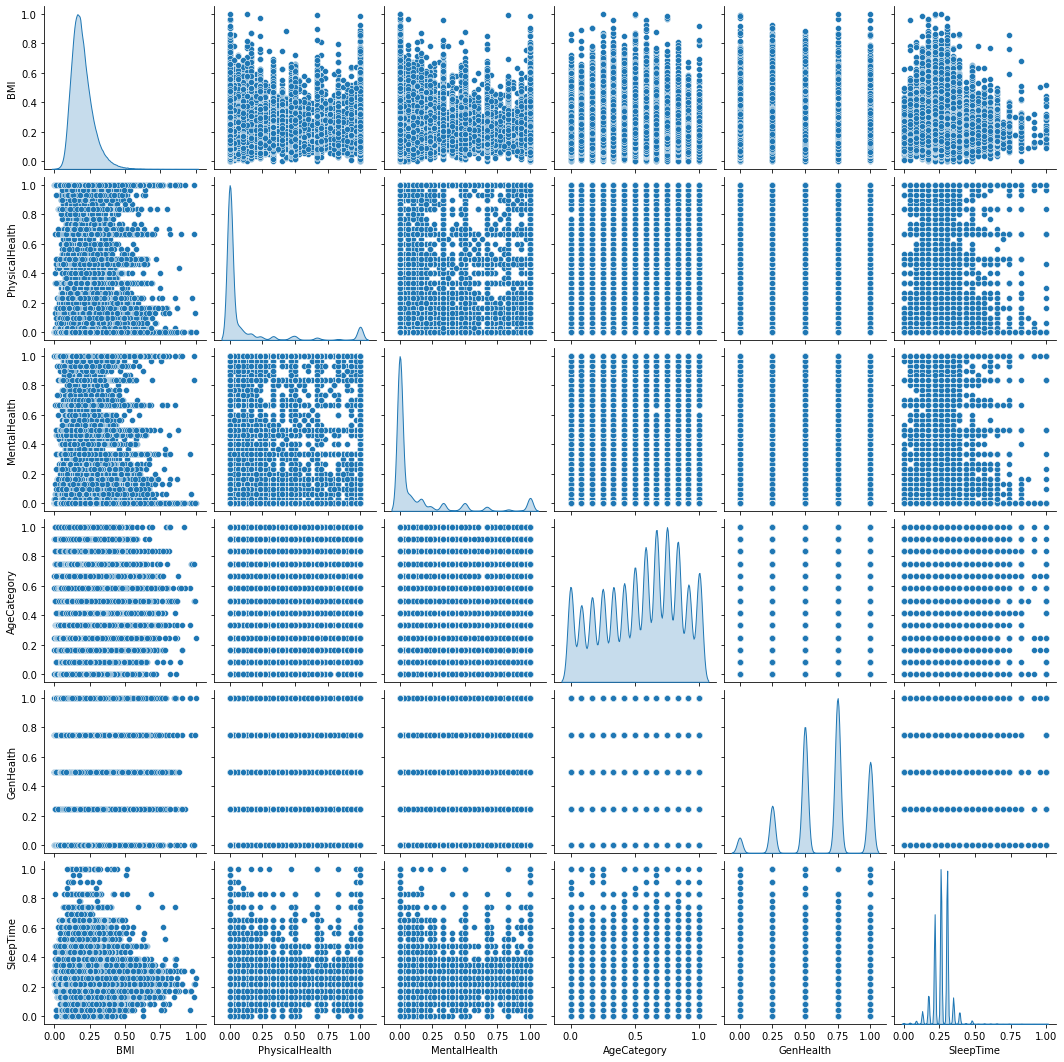

In [28]:
sns.pairplot(df, diag_kind='kde')

In [29]:
df.iloc[:, 0]

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 319795, dtype: category
Categories (2, int64): [0, 1]

## Balanceado datos

In [30]:
df_array = np.array(df)
X = df_array[:, 1:]
m = np.shape(X)[0]

#Obtencion de la primera columna de la tabla, la de salida
Y = df_array[:, 0]
n = np.shape(X)[1]

In [31]:
#smote = SMOTE(random_state=1000)
#XSmote, YSmote = smote.fit_resample(X,Y)
            

In [32]:
#rus = RandomUnderSampler(random_state=1000)
#Xrus, Yrus = rus.fit_resample(X,Y)

In [33]:
#nm = NearMiss()
#XnearMiss, YnearMiss = nm.fit_resample(X,Y)

## Regresión logística

In [34]:
def sigmoid_funct(z):
    #z=np.array(z,dtype=np.float)
    return 1 / (1 + np.exp(-z))

def func_coste_reg(Thetas, X, Y, lmb, m):
    return cost_funct(Thetas, X, Y) + regularizacion(Thetas[1:], lmb, m)

def regularizacion(Thetas, lmb, m):
    return (lmb/(2*m))*np.sum(Thetas**2)

def func_grad_reg(Thetas, X, Y, lmb, m):
    return np.add(gradient(Thetas, X, Y), reg_grad(Thetas[1:], lmb, m))

def reg_grad(Thetas, lmb, m):
        return np.insert(lmb/m*Thetas, 0, values=[0])
    
def cost_funct(Theta, X, Y):
    g = sigmoid_funct(np.matmul(X, Theta))
    m = np.shape(X)[0]
    
    J = (np.matmul(np.transpose(np.log(g)), Y)) + (np.matmul(np.transpose(np.log(1-g)), (1 - Y)))
    return np.sum(-J)/m

def gradient(Theta, X, Y):
    m = np.shape(X)[0]
    g = sigmoid_funct(np.matmul(X,Theta))
    #print("f" ,g)
    J = np.dot(np.transpose(X), (g - Y))
    #print("X" ,np.matmul((g - Y), X))
    return J/m

In [35]:
def logistic_regresion():
    data = load_csv('ex2data1.csv')
    #Obtencion de todas las columnas de la tabla menos la ultima columna
    X = data[:, :-1]
    m = np.shape(X)[0]
    # Aregamos una columna de 1s
    X = np.hstack([np.ones([m, 1]), X])
    n = np.shape(X)[1]
    #Obtencion de la ultima columna de la tabla
    Y = data[:, -1]

    Theta = np.zeros(n)
    
    result = opt.fmin_tnc(func=cost_funct, x0=Theta, fprime=gradient, args=(X,Y), messages=0)
    theta_opt = result[0]
    
    print("theta optimizada:", theta_opt)
    print("Coste final:" , cost_funct(theta_opt, X,Y))
    pinta_frontera_recta(X, Y, theta_opt)
    #aux()
    porcentaje =  porcentaje_aciertos(theta_opt, X, Y)
    print(porcentaje)
    

In [36]:
def porcentaje_aciertos(Theta, X, Y):
    # Calculamos los valores estimados segun la theta que hemos obtenido
    sigmoid = sigmoid_funct(np.matmul(X, Theta))

    # Se compara la estimacion nuestra con el resultado real (Y).
    # Se devuelve el numeros de ejemplos que se han estimado
    # correctamente, es decir, para aquellos que tengan
    # el resultado del sigmoide mayor o igual a 0.5
    evaluation_correct = np.sum((sigmoid >= 0.5) == Y)
    
    print(classification_report(Y,(sigmoid >= 0.5), target_names=["no", "si"]))
    print(confusion_matrix(Y,(sigmoid >= 0.5)))
    # Devolvemos el porcentaje
    return evaluation_correct/len(sigmoid) * 100

In [37]:

def mainRL(X, Y):
    #Obtencion de todas las columnas de la tabla menos la de salida la primera
    m = np.shape(X)[0]
    n = np.shape(X)[1]

    #print()
    #print(n)
    print((Y== 0).sum())
    print( (Y== 1).sum() )
    #Inicializamos las Thetas a 0
    Thetas = np.zeros(n)
    #print(Thetas)

    #lmb = [0.1,0.25, 0.5,0.75,1,1.5, 2,3,4,5,6,7,10]
    #lmb = [0,0.01,0.025, 0.05, 0.075]
    lmb = [0.1,1000]
    print(np.shape(X))


    #print(np.dot(X, Thetas))
    #Para cada lambda calculamos las Thetas óptimas, pintamos la función y sacamos el porcentaje de aciertos
    for i in lmb:
        print("cost",func_coste_reg(Thetas, X, Y, i, m))
        print("grad",func_grad_reg(Thetas, X, Y, i, m))
        result = opt.fmin_tnc(func=func_coste_reg, x0=Thetas, fprime=func_grad_reg, args=(X,Y,i,m), messages=0)
        print("Lambda: " , i)
        print(result[0])
        porcentaje =  porcentaje_aciertos(result[0], X, Y)
        print("Porcentaje aciertos: " + str(porcentaje))
        


In [38]:
#mainRL(XSmote, YSmote)

## Redes neuronales

In [39]:
def func_coste_reg(Thetas, X, Y, lmb):
    m = np.shape(X)[0]
    return cost_funct(Y, X, m) + regularizacion(Thetas, lmb, m)

def cost_funct(Y, g, m):
    J = np.sum(-1.0*Y* np.log(g) -1.0*(1 - Y)* np.log(1-g))
    return J/m

def regularizacion(Thetas, lmb, m):
    suma = 0
    for i in Thetas:
        i = i[:,1:]
        suma += (np.sum(i**2))
    
    return (lmb/(2*m))*suma

In [40]:
def forward_propagation(X, theta1, theta2, m, Y):
    
    #Capa entrada asignamos la X con los unos incluidos
    a1 = np.hstack([np.ones([m, 1]), X])

    #capa intermedia (hidden) calculamos las ecuaciones de la anterior, aplicamos la sigmoide e incluimos los unos de la neurona 0 
    z2 = np.dot(a1, theta1.T)
    a2 = np.hstack([np.ones([m, 1]), sigmoid_funct(z2)])

    #Capa salida calcuamos las ecuaciones con theta2 y aplicamos la sigmoide, nos devuelve la matriz de salida 5000x10
    z3 = np.dot(a2, theta2.T)
    
    a3 = sigmoid_funct(z3)
    
    return a1, z2, a2, z3, a3

In [41]:
#Genera los pesos aleatorios
def RandomWeights(entradas, salidas, ini):
    Theta = np.random.uniform(-ini, ini, size = (salidas,entradas+1))
    return Theta

In [42]:
    
def backprop(params_rn, num_entradas, num_ocultas, num_etiquetas, X, Y, reg):    
    #Recostruimos las Thetas
    Theta1 = np.reshape(params_rn[:num_ocultas *(num_entradas + 1)],(num_ocultas, (num_entradas+1)))
    Theta2 = np.reshape(params_rn[num_ocultas*(num_entradas + 1): ], (num_etiquetas,(num_ocultas+1)))
    
    m = X.shape[0]    
    y_onehot = Y
    
    a1, z2, a2, z3, a3 = forward_propagation(X, Theta1, Theta2, m, y_onehot)
    
    #Calculamos el coste
    coste = func_coste_reg([Theta1, Theta2], a3, y_onehot, reg)


    d3 = a3 - y_onehot
    d2 = np.matmul(Theta2.T,d3.T)*(a2*(1-a2)).T
    
    #Calculamos los gradientes no regularizados
    G1 = np.matmul(d2[1:,:], a1)/m
    G2 = np.matmul(d3.T,a2)/m
    
    #Calculamos los gradientes regularizados
    G1 = G1 + ((reg*1.0)/m)*np.insert(Theta1[:, 1:], 0, 0, axis = 1)
    G2 = G2 + ((reg*1.0)/m)*np.insert(Theta2[:, 1:], 0, 0, axis = 1)

    #Ponemos los gradientes en forma de lista
    gradientes = np.concatenate((G1, G2), axis = None)
    
    return coste, gradientes

In [43]:
def optimize_backprop_and_check (num_entradas, num_ocultas, num_etiquetas, reg, X, laps, Y, ini):
    
    #Inicializamos los pesos y los ponemos en forma de lista
    Theta1 = RandomWeights(num_entradas, num_ocultas, ini)
    Theta2 = RandomWeights(num_ocultas, num_etiquetas, ini)
    pesos = np.concatenate((Theta1, Theta2), axis=None)

    #Optimizamos
    out = opt.minimize(fun = backprop, x0 = pesos, args = (num_entradas, num_ocultas, num_etiquetas, X, Y, reg), method='TNC', jac = True, options = {'maxiter': laps})

    #Reconstruimos las Thetas
    Theta1 = out.x[:(num_ocultas*(num_entradas+1))].reshape(num_ocultas,(num_entradas+1))
    Theta2 = out.x[(num_ocultas*(num_entradas+1)):].reshape(num_etiquetas,(num_ocultas+1))
    
    m = X.shape[0]
    #Hacemos el forward propagation
    a1, z2, a2, z3, a3 = forward_propagation(X, Theta1, Theta2, m, Y)
    
    #Sacamos los aciertos
    Y = Y.ravel()
    indexes = np.argmax(a3, axis=1)
    acc = (np.sum(indexes == (Y))/m)*100
    print(classification_report(Y,indexes, target_names=["no", "si"]))
    print(confusion_matrix(Y,indexes))
    
    print("Porcentaje aciertos: ", acc)
    return acc

In [44]:
def main(X, Y):
    #Check del gradiente con reg
    #print(grad.checkNNGradients(backprop, reg))
    
    num_labels = 2
    
    num_entries = np.shape(X)[1]
    num_hiden_layers = 5000
    reg =1
    y = np.array([Y])
    y = y.T
    #print(y)
    acc = optimize_backprop_and_check(num_entries, num_hiden_layers, num_labels, reg, X, 70, y, 0.12)
   
    #Pruebas
    '''l = [0,0.05,0.1, 0.25, 0.5, 1,2 ,3 ,4, 5,10,20,100]
    g = [30, 50, 70, 100, 200, 300]
    for i in g:
        print("iteraciones: " ,i)
        for j in range (0, 5):
            acc = optimize_backprop_and_check(num_entries, num_hiden_layers, num_labels, reg, X, y_onehot, i, y, 0.12)
            
    for i in l:
        print("Lambda: " ,i)
        for j in range (0, 5):
            acc = optimize_backprop_and_check(num_entries, num_hiden_layers, num_labels, i, X, y_onehot, 70, y, 0.12)
    '''
    return acc

In [45]:
#main(Xrus, Yrus)

In [46]:
def calculate_recall(y_pred, y_real):
    num_total = len(y_pred)
    
    labels = unique_labels(y_real)
    
        
    recall = recall/len(labels)
    return recall

In [47]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.savefig(title)
    return ax

In [48]:
RANDOM_STATE = 7777

X_train, X_temp, Y_train, Y_temp  = train_test_split(X, Y, test_size=0.4, random_state=RANDOM_STATE, stratify=Y)

X_val , X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=RANDOM_STATE, stratify=Y_temp)

rus = RandomUnderSampler(random_state=1000)
Xrus, Yrus = rus.fit_resample(X_train, Y_train)

#nm = NearMiss()
#XnearMiss, YnearMiss = nm.fit_resample(X_train, Y_train)

X_svm_train = Xrus
Y_svm_train = Yrus

X_svm_test = X_test
Y_svm_test = Y_test

X_svm_val = X_val
Y_svm_val = Y_val

#X_svm_train, X_svm_test, Y_svm_train, Y_svm_test = train_test_split(X_svm, Y_svm, test_size=0.4, random_state=RANDOM_STATE)

In [49]:
def svm_linearKernel():
    
    #C = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 50]
    C = [0.01, 0.1, 1, 10, 40]
    c = 0

    accAux = 0
    for i in C:
        svm_clf = svm.SVC(kernel='linear' , C=i)
        svm_clf.fit(X_svm_train, Y_svm_train)

        print("Finished fit")
        
        Y_svm_predict = svm_clf.predict(X_svm_test)

        print("Finished predicting")
        
        print(classification_report(Y_svm_test, Y_svm_predict, target_names=['normal', 'enfermo']))

        #Confusion Matrix
        title_img = "randomState_linearKernel" + str(i) + ".png"
        plot_confusion_matrix(Y_svm_test, Y_svm_predict, ['normal', 'enfermo'], normalize=True, title=title_img)
        print(confusion_matrix(Y_svm_test, Y_svm_predict))
        
        acc = svm_clf.score(X_svm_val, Y_svm_val)
        cross_score = cross_val_score(svm_clf, X_svm_val, Y_svm_val, cv=5, scoring='balanced_accuracy')
        print("Accuracy:", acc)
        print("AcurracyBalanced:", cross_score)
        print("\n---------------Finish---------------\n")
        """acc = svm_clf.score(X_svm_test, Y_svm_test)
        if (acc > accAux):
            accAux = acc
            c = i
        print(acc, "C =", i)
        print("accuraccy:", acc, "  C =", i, " Sigma =", j)"""

In [50]:
def svm_gaussianKernel():
    
    C = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 50]
    sigma = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 50]
    #C = [0.01, 0.1, 1, 10, 40]
    #sigma = [0.01, 0.1, 1, 10, 40]
    c = 0
    sig = 0

    accAux = 0
    for i in C:
        for j in sigma:
            print("Execution:", i, j)
            svm_clf = svm.SVC(kernel='rbf' , C=i, gamma = (1 / (2 * j**2)))
            svm_clf.fit(X_svm_train, Y_svm_train)

            print("Finish fit")
            
            Y_svm_predict = svm_clf.predict(X_svm_test)

            print("Finished predicting")
            
            print(classification_report(Y_svm_test, Y_svm_predict, target_names=['normal', 'enfermo']))

            #Confusion Matrix
            title_img = "randomState_gaussianKernel" + str(i) + "_" + str(j) + ".png"
            plot_confusion_matrix(Y_svm_test, Y_svm_predict, ['normal', 'enfermo'], normalize=True, title=title_img)
            print(confusion_matrix(Y_svm_test, Y_svm_predict))
            
            """acc = svm_clf.score(X_svm_test, Y_svm_test)
            if (acc > accAux):
                accAux = acc
                c = i
                sig = j
            print("acc:", acc, "  C =", i, " Sigma =", j)"""

In [51]:
svm_linearKernel()

Finished fit
Finished predicting
              precision    recall  f1-score   support

      normal       0.97      0.74      0.84     58485
     enfermo       0.22      0.79      0.34      5474

    accuracy                           0.74     63959
   macro avg       0.60      0.76      0.59     63959
weighted avg       0.91      0.74      0.80     63959

Normalized confusion matrix
[[0.73637685 0.26362315]
 [0.21081476 0.78918524]]
[[43067 15418]
 [ 1154  4320]]
Accuracy: 0.7397864256789506
AcurracyBalanced: [0.5 0.5 0.5 0.5 0.5]

---------------Finish---------------

Finished fit
Finished predicting
              precision    recall  f1-score   support

      normal       0.97      0.73      0.84     58485
     enfermo       0.22      0.80      0.34      5474

    accuracy                           0.74     63959
   macro avg       0.60      0.76      0.59     63959
weighted avg       0.91      0.74      0.79     63959

Normalized confusion matrix
[[0.73035821 0.26964179]
 [0.20241

In [ ]:
vbcvn
fdhdf

sdfsd
@a

Execution: 0.01 0.01
Finish fit
Finished predicting
              precision    recall  f1-score   support

     enfermo       0.97      0.18      0.30     58485
      normal       0.10      0.94      0.17      5474

    accuracy                           0.24     63959
   macro avg       0.53      0.56      0.24     63959
weighted avg       0.89      0.24      0.29     63959

Normalized confusion matrix
[[0.17785757 0.82214243]
 [0.06320789 0.93679211]]
[[10402 48083]
 [  346  5128]]
Execution: 0.01 0.03
Finish fit
Finished predicting
              precision    recall  f1-score   support

     enfermo       0.98      0.09      0.17     58485
      normal       0.09      0.98      0.17      5474

    accuracy                           0.17     63959
   macro avg       0.54      0.54      0.17     63959
weighted avg       0.91      0.17      0.17     63959

Normalized confusion matrix
[[0.09422929 0.90577071]
 [0.01625868 0.98374132]]
[[ 5511 52974]
 [   89  5385]]
Execution: 0.01 0.1
Fi

/var/folders/5g/32qmkgbs0ynf64vm8b185ky40000gn/T/ipykernel_5366/3837608181.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


[[16858 41627]
 [  277  5197]]
Execution: 0.1 0.3
Finish fit
Finished predicting
              precision    recall  f1-score   support

     enfermo       0.98      0.54      0.70     58485
      normal       0.15      0.88      0.26      5474

    accuracy                           0.57     63959
   macro avg       0.57      0.71      0.48     63959
weighted avg       0.91      0.57      0.66     63959

Normalized confusion matrix
[[0.54292554 0.45707446]
 [0.11563756 0.88436244]]
[[31753 26732]
 [  633  4841]]
Execution: 0.1 1
Finish fit
Finished predicting
              precision    recall  f1-score   support

     enfermo       0.98      0.71      0.82     58485
      normal       0.21      0.82      0.33      5474

    accuracy                           0.72     63959
   macro avg       0.59      0.76      0.57     63959
weighted avg       0.91      0.72      0.78     63959

Normalized confusion matrix
[[0.70549714 0.29450286]
 [0.18067227 0.81932773]]
[[41261 17224]
 [  989  4485

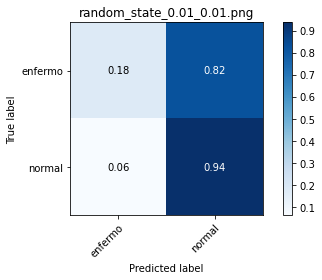

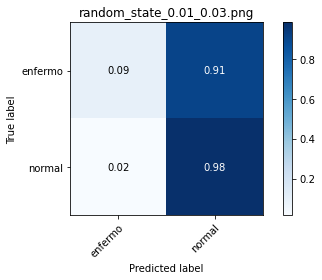

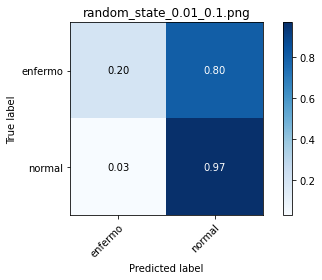

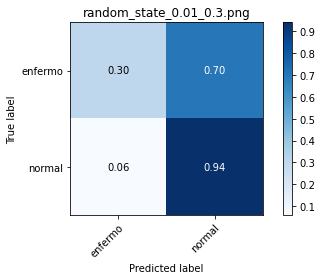

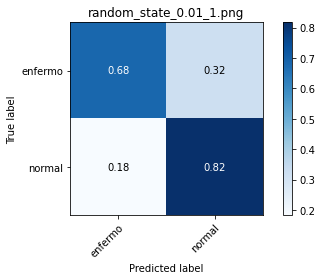

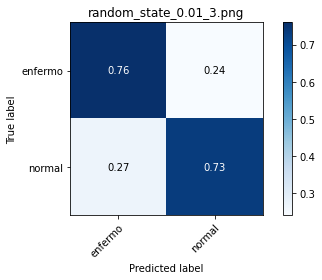

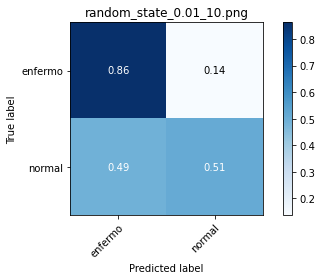

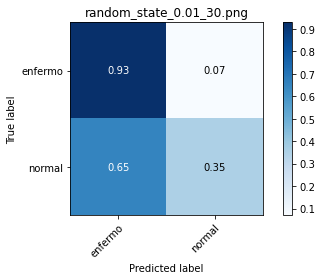

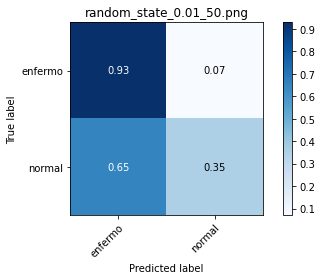

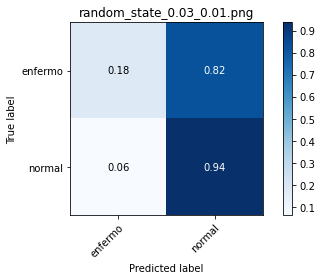

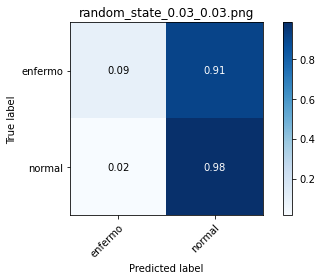

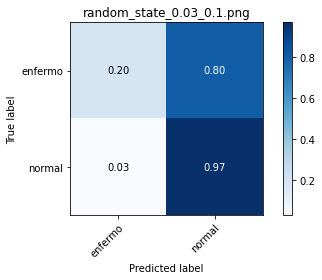

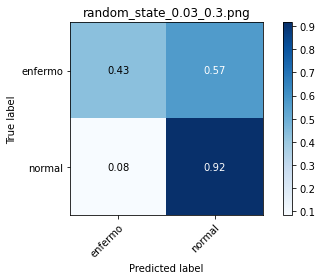

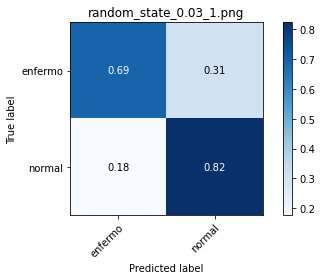

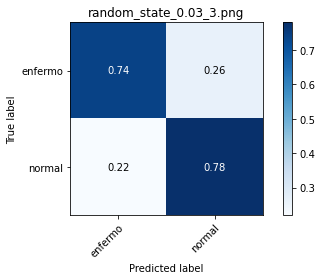

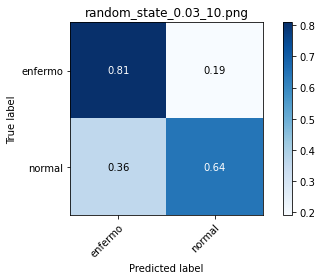

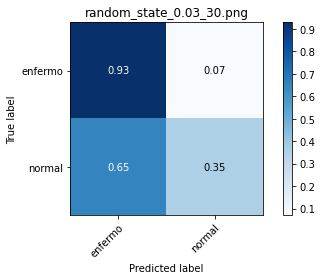

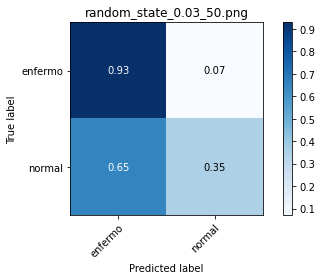

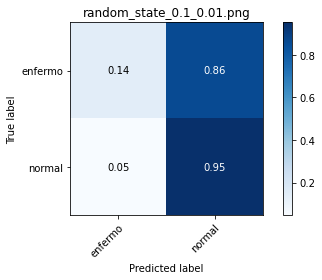

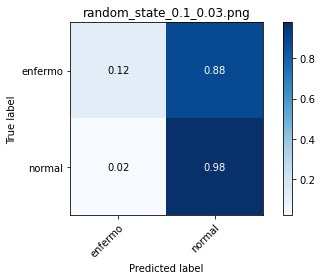

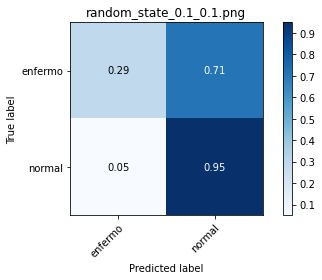

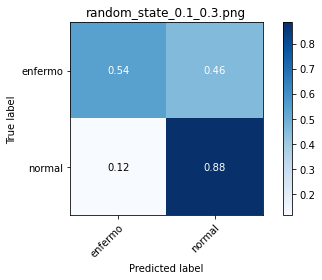

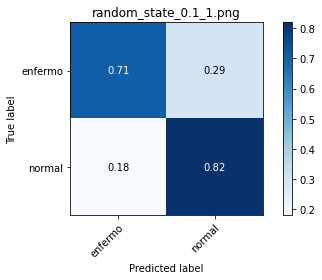

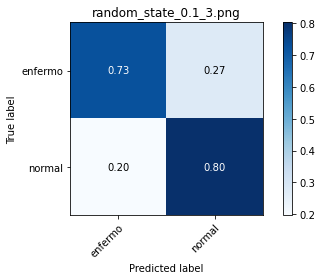

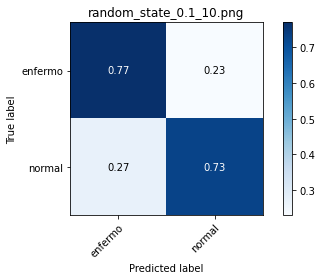

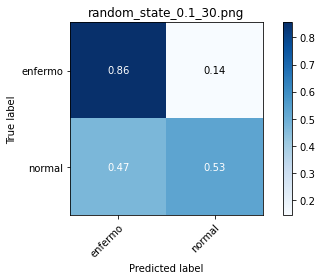

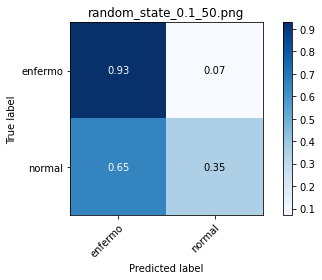

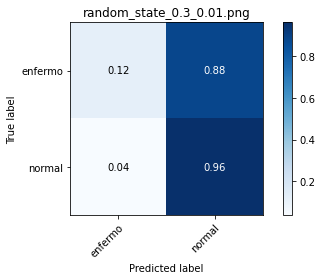

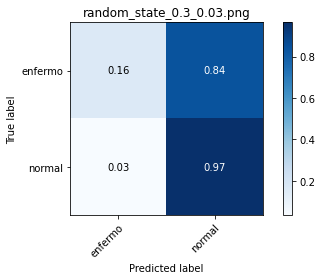

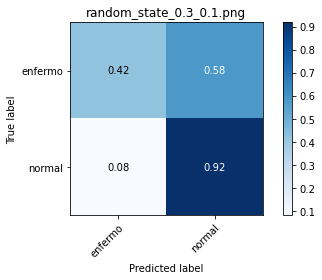

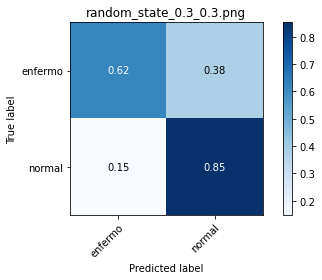

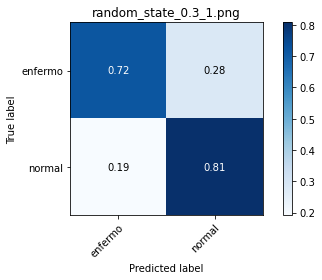

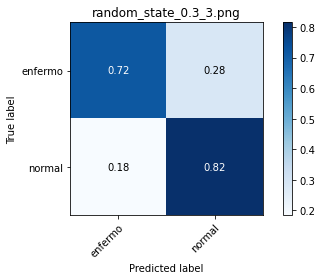

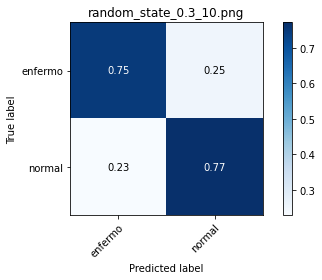

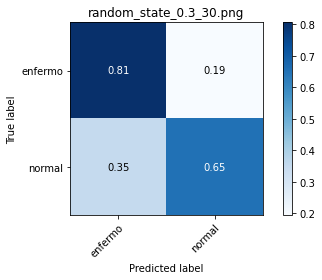

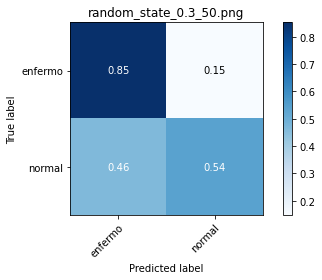

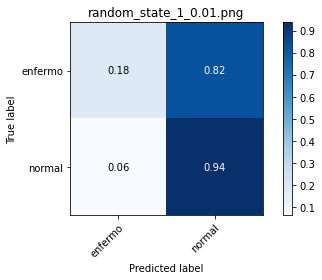

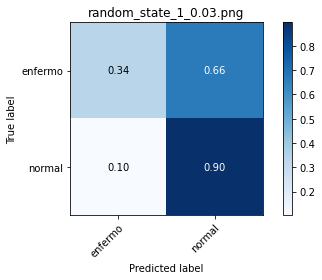

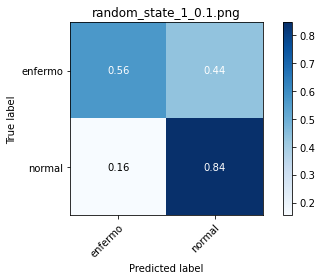

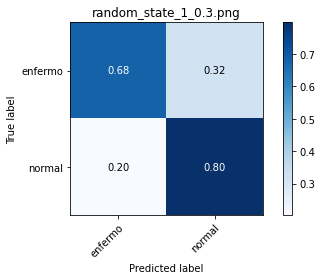

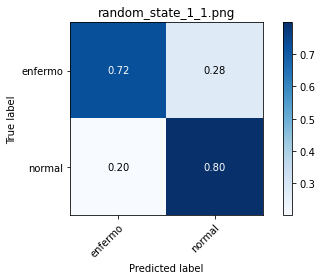

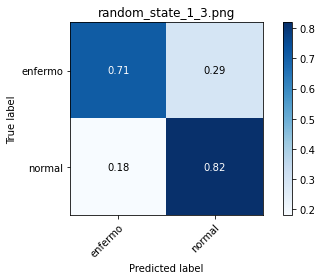

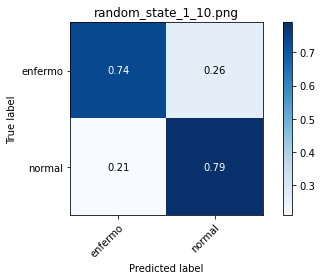

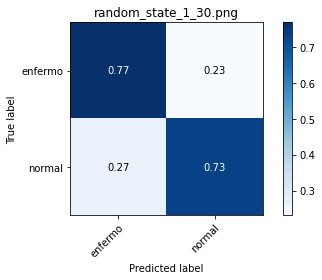

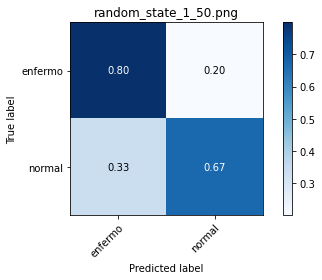

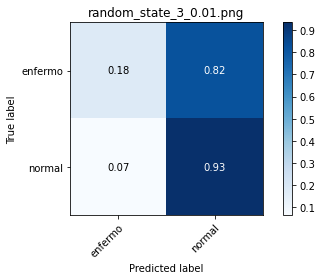

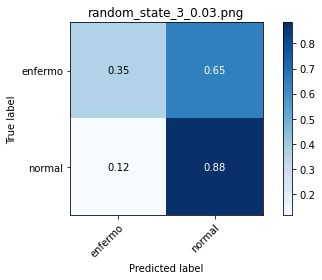

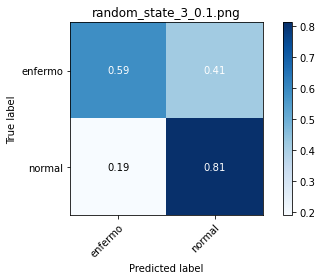

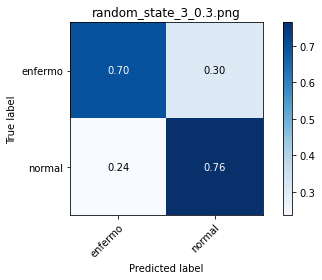

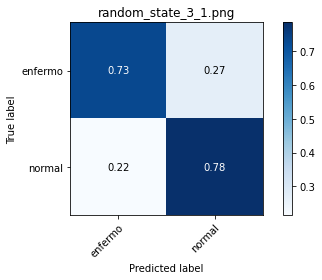

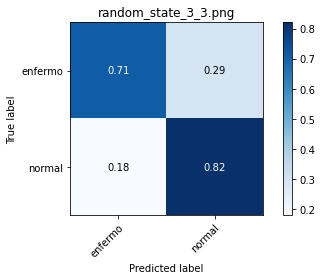

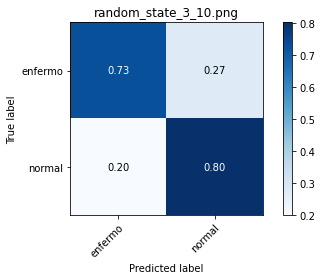

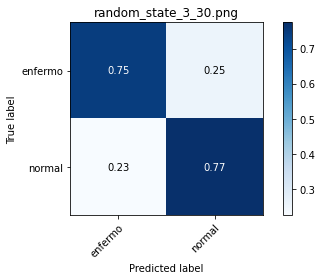

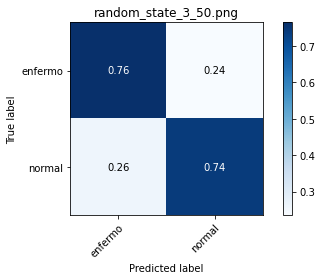

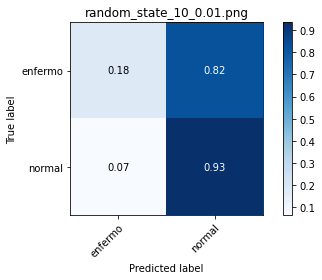

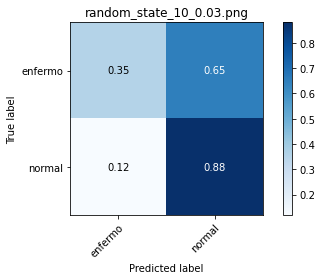

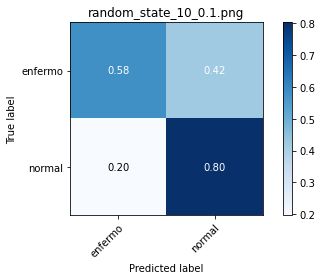

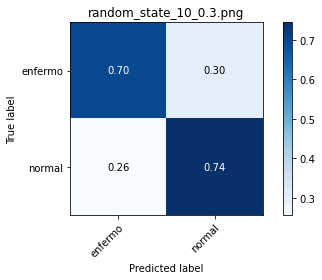

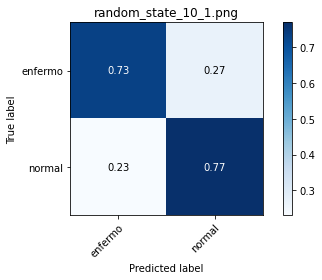

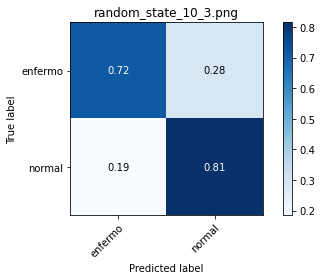

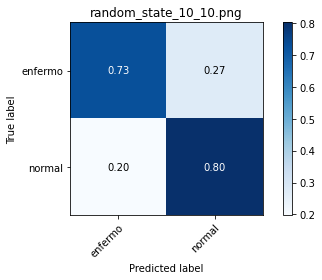

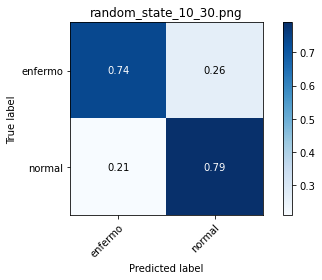

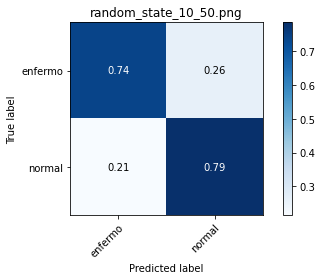

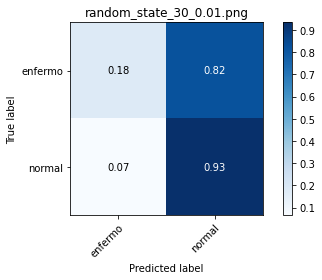

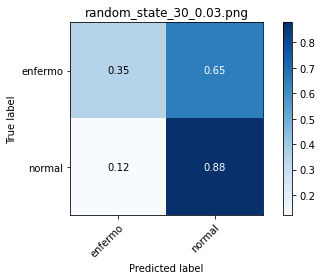

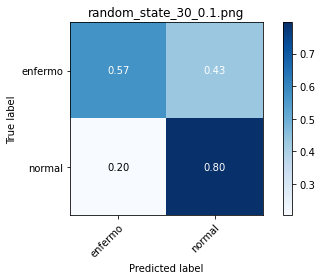

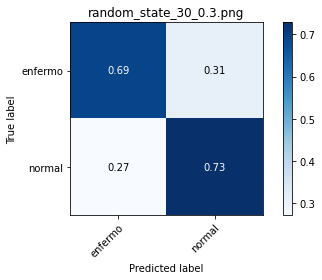

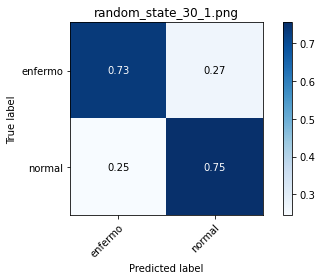

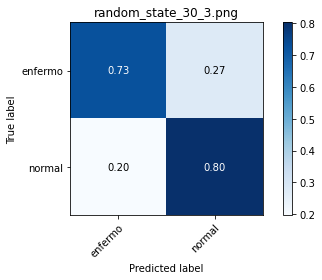

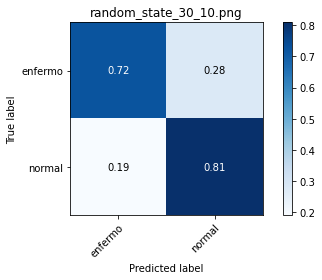

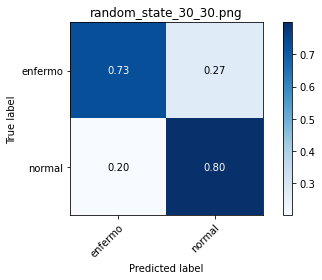

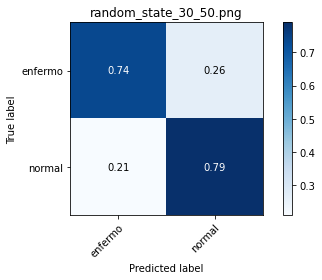

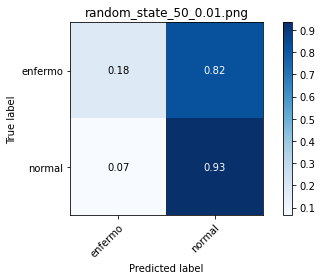

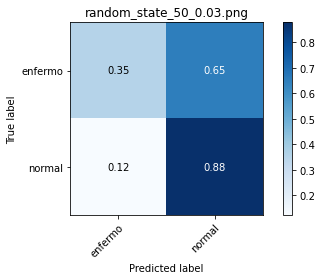

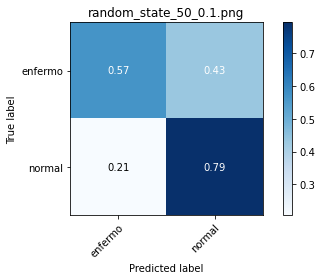

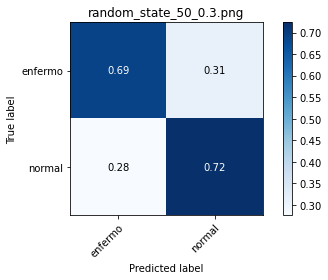

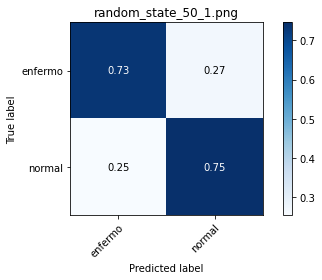

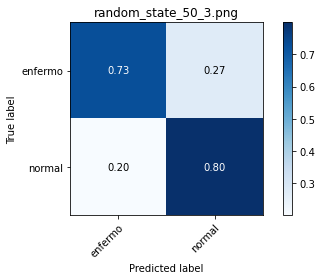

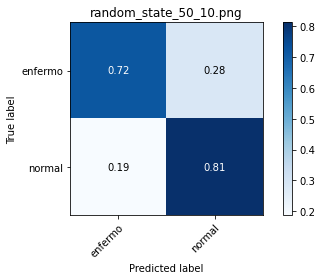

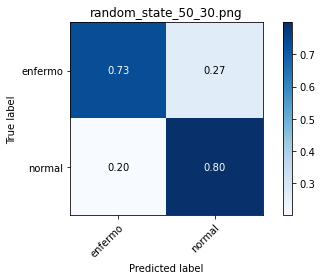

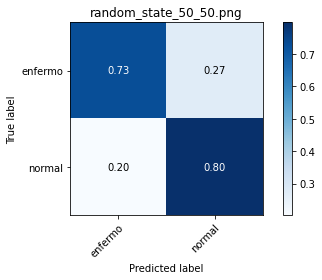

In [ ]:
#svm_gaussianKernel()

In [ ]:
#Imbalanced learn para poner los datos equilibrados, dividir training, validacion y test
#Funciones recall, precision, F1
#SVM
#Cambiar hiperparametros
#ESCRIBIR MEMORIA